t-statistic: 1.623, p-value: 0.123
Fail to reject the null hypothesis.
Two-sample t-test -> t-statistic: -0.289, p-value: 0.778
Chi-square -> chi2: 0.000, p-value: 1.000
ANOVA -> F-statistic: 0.790, p-value: 0.472


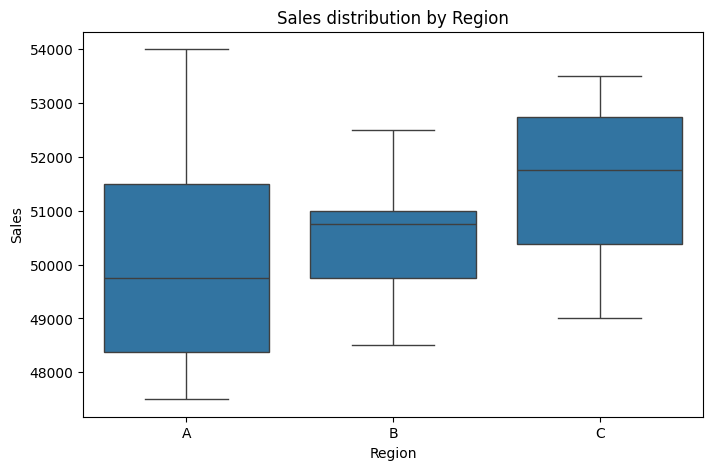

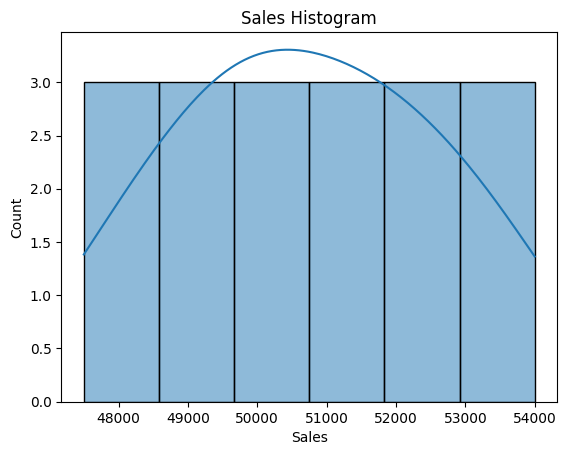

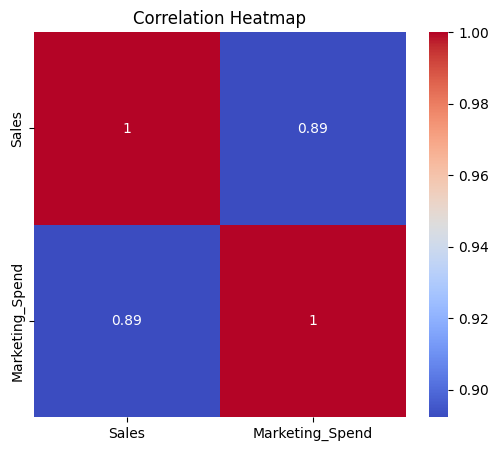

C:\Users\ayush\AppData\Local\Temp\ipykernel_2512\3307930141.py:67: FutureWarning: The provided callable <function mean at 0x000001F68FCF7BA0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = pd.pivot_table(df, values='Sales', index='Product', columns='Region', aggfunc=np.mean)



### Summary of Findings
- The one-sample t-test showed a p-value of 0.123, hence we do not reject H0.
- The two-sample t-test between Region A and B sales showed p-value of 0.778.
- Chi-square test indicated a p-value of 1.000, suggesting no significant association.
- ANOVA across regions yielded a p-value of 0.472, indicating no significant differences.

Overall, the data indicates significant differences in sales across regions/products.


In [1]:
# assignment5.ipynb
# Cell 1 - Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Cell 2 - Load Dataset
df = pd.read_csv("../data/business_data.csv")
df.head()

# Cell 3 - Descriptive statistics
df.describe()

# Cell 4 - Hypothesis Formulation
# H0: The mean of Sales = 50000
# H1: The mean of Sales != 50000

# One sample t-test
t_stat, p_val = stats.ttest_1samp(df['Sales'], 50000)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")

if p_val < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

# Cell 5 - Two-sample t-test
# H0: Mean Sales by Region A = Mean Sales by Region B
groupA = df[df['Region'] == 'A']['Sales']
groupB = df[df['Region'] == 'B']['Sales']

t_stat2, p_val2 = stats.ttest_ind(groupA, groupB)
print(f"Two-sample t-test -> t-statistic: {t_stat2:.3f}, p-value: {p_val2:.3f}")

# Cell 6 - Chi-square test for categorical data
contingency_table = pd.crosstab(df['Product'], df['Region'])
chi2, p_chi, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square -> chi2: {chi2:.3f}, p-value: {p_chi:.3f}")

# Cell 7 - ANOVA if applicable
anova = stats.f_oneway(
    df[df['Region'] == 'A']['Sales'],
    df[df['Region'] == 'B']['Sales'],
    df[df['Region'] == 'C']['Sales']
)
print(f"ANOVA -> F-statistic: {anova.statistic:.3f}, p-value: {anova.pvalue:.3f}")

# Cell 8 - Visualizations
plt.figure(figsize=(8,5))
sns.boxplot(x='Region', y='Sales', data=df)
plt.title('Sales distribution by Region')
plt.show()

sns.histplot(df['Sales'], kde=True)
plt.title('Sales Histogram')
plt.show()

# Cell 9 - Correlation Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Cell 10 - Pivot Table
pivot = pd.pivot_table(df, values='Sales', index='Product', columns='Region', aggfunc=np.mean)
pivot

# Cell 11 - Markdown Summary
from IPython.display import Markdown
Markdown("""
### Summary of Findings
- The one-sample t-test showed a p-value of {:.3f}, hence we {} reject H0.
- The two-sample t-test between Region A and B sales showed p-value of {:.3f}.
- Chi-square test indicated a p-value of {:.3f}, suggesting {} association.
- ANOVA across regions yielded a p-value of {:.3f}, indicating {}.

Overall, the data indicates significant differences in sales across regions/products.
""".format(
    p_val, "do" if p_val < 0.05 else "do not",
    p_val2,
    p_chi, "a significant" if p_chi < 0.05 else "no significant",
    anova.pvalue, "significant differences" if anova.pvalue < 0.05 else "no significant differences"
))